# Klasteryzacja

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [206]:
from sklearn.datasets import make_blobs
features, true_labels = make_blobs(n_samples=200, centers=3, cluster_std=1)

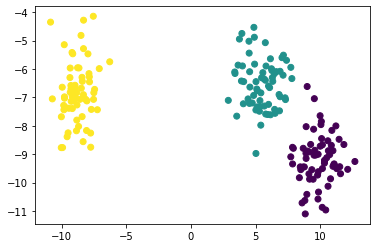

In [207]:
plt.scatter(features[:,0], features[:,1], c=true_labels)

Algorytm k-średnich (k-means):
- Wylosuj początkowe wartości centroid
- Przyporządkuj każdy punkt do najbliższego centroidu
- Wyznacz nowe centroidy jako średnie arytmetyczne punktów przypisanych do starych centroid
- Powtarzaj od kroku 2 (dopóki punkt 2 nie zmieni przynależności punktów do centroid)

Algorytm k-średnich minimalizuje funkcję straty:
$L(\mu_1, \ldots \mu_K, \tau_1, \ldots, \tau_N) = \sum_{i=1}^N ||x_i - \mu_{\tau_i}||^2$

W pierwszym kroku następuje minimalizacja $L$ po $\tau$ przy ustalonych $\mu$.

W drugim kroku następuje minimalizacja $L$ po $\mu$ przy ustalonych $\tau$. 

Wybrów początkowych centroidów - losowe elemnty zbioru danych!
Algorytm jest stochastyczny (losowy wybór początkowych centroidów)! Jeżeli to możliwe Wykonujemy kilka iteracji z innymi centroidami początkowymi.

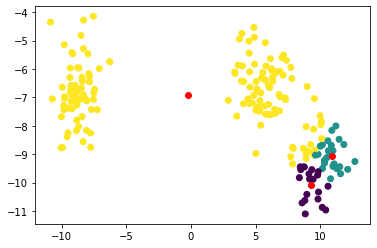

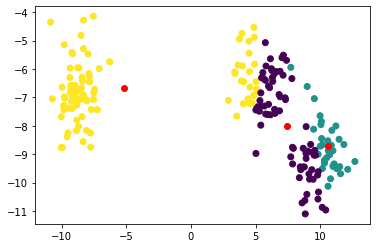

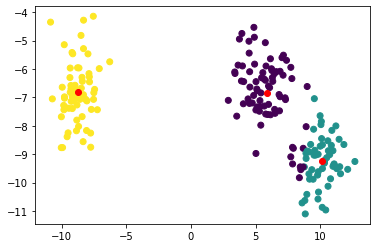

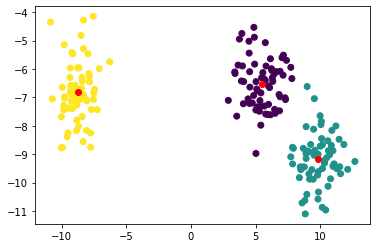

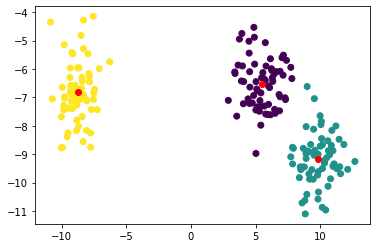

In [212]:
from scipy.spatial import distance

def kmeans_algorithm(data, num_clusters, visualisation_moments, max_iter_num=1000):
    centroids = data[np.random.choice(len(data), num_clusters)]
    finish = False
    iter_num = 0
    centroid_assigment = list()
    def assign_new_centroids(data, centroids):
        centroid_assigment_new = list()
        for x in data:
            distances = [distance.euclidean(x, centroid) for centroid in centroids]
            centroid_assigment_new.append(distances.index(min(distances)))
        
        return centroid_assigment_new

    def recalculate_centroids(data, centroid_assigment_new, num_clusters):
        new_centroids = list()
        for i in range(num_clusters):
            new_centroids.append(np.mean(data[np.array(centroid_assigment_new) == i], axis = 0))
        return np.array(new_centroids)
    
    while not finish or iter_num >= max_iter_num:
        centroid_assigment_new = assign_new_centroids(data, centroids)        
        centroids = recalculate_centroids(data, centroid_assigment_new, num_clusters)
        
        if iter_num in visualisation_moments:
            plt.figure()
            plt.scatter(data[:, 0], data[:, 1], c=centroid_assigment_new)
            plt.scatter(centroids[:, 0], centroids[:,1], c='red')
            plt.show()
            
        if centroid_assigment_new == centroid_assigment:
            finish = True
        else:
            centroid_assigment = centroid_assigment_new
        iter_num +=1
    return centroid_assigment, centroids

m = kmeans_algorithm(features, 3, [0, 1, 2, 3, 4, 5])

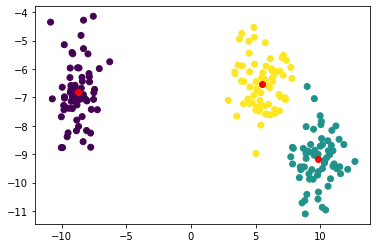

In [214]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(features)
plt.scatter(features[:,0], features[:,1], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1], c='red')

In [16]:
def plot_elbowplot(data):
    sse = {}
    for k in range(1, 10):
        kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
        sse[k] = kmeans.inertia_
    plt.figure()
    plt.plot(list(sse.keys()), list(sse.values()))
    plt.xlabel("Number of cluster")
    plt.ylabel("SSE")
    plt.show()

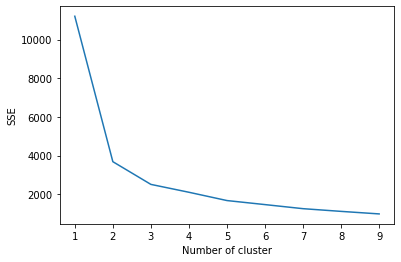

In [22]:
plot_elbowplot(features)

In [123]:
data = pd.read_csv('/home/johny/Documents/Podyplomowe/customers.csv')
data.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [124]:
np.unique(data.Region)

array([1, 2, 3])

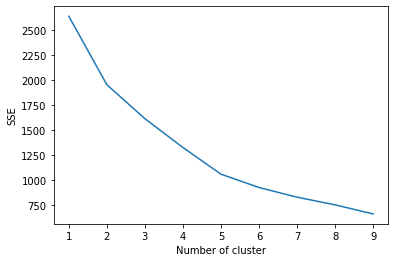

In [21]:
from sklearn.preprocessing import StandardScaler
plot_elbowplot(StandardScaler().fit_transform(data.drop(['Channel', 'Region'], axis=1)))

In [139]:
kmeans = KMeans(n_clusters=3).fit(data.drop(['Channel', 'Region'], axis=1))
pd.crosstab(kmeans.labels_, data.Channel)

Channel,1,2
row_0,,
0,244,85
1,52,8
2,2,49


In [151]:
data.loc[data['cluster'] == 0].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.0
mean,1.258359,2.553191,8249.996960,3800.966565,5248.556231,2571.677812,1755.112462,1137.018237,0.0
std,0.438399,0.767716,6203.295447,3167.764469,4338.746265,3409.848141,2164.321110,1281.958907,0.0
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000,0.0
25%,1.000000,2.000000,2861.000000,1275.000000,2000.000000,660.000000,232.000000,361.000000,0.0
50%,1.000000,3.000000,7149.000000,2820.000000,3444.000000,1389.000000,637.000000,772.000000,0.0
75%,2.000000,3.000000,12377.000000,5758.000000,7684.000000,3141.000000,2894.000000,1542.000000,0.0
max,2.000000,3.000000,22686.000000,18664.000000,22272.000000,35009.000000,10069.000000,14472.000000,0.0


In [153]:
data.loc[data['cluster'] == 1].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.0
mean,1.133333,2.566667,35941.400000,6044.450000,6288.616667,6713.966667,1039.666667,3049.466667,1.0
std,0.342803,0.789049,15234.899532,7055.554173,4629.034083,9555.164909,1302.215019,6355.491280,0.0
min,1.000000,1.000000,22096.000000,286.000000,471.000000,127.000000,10.000000,3.000000,1.0
25%,1.000000,2.750000,26294.250000,2054.250000,2575.500000,1364.750000,272.750000,949.500000,1.0
50%,1.000000,3.000000,30818.000000,3954.500000,5058.500000,3662.000000,511.500000,1535.500000,1.0
75%,1.000000,3.000000,40370.750000,7160.000000,8259.750000,8871.000000,1116.500000,2880.250000,1.0
max,2.000000,3.000000,112151.000000,43950.000000,20170.000000,60869.000000,5058.000000,47943.000000,1.0


In [154]:
data.loc[data['cluster'] == 2].describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.0
mean,1.960784,2.450980,8027.411765,18375.921569,27342.549020,2014.313725,12314.607843,2233.254902,2.0
std,0.196039,0.807805,9035.038851,12883.867652,14464.558588,2052.296309,7979.880318,2663.207043,0.0
min,1.000000,1.000000,85.000000,3737.000000,13567.000000,33.000000,282.000000,3.000000,2.0
25%,2.000000,2.000000,1839.000000,11094.000000,19632.500000,796.000000,7389.000000,723.500000,2.0
50%,2.000000,3.000000,5531.000000,14399.000000,22294.000000,1274.000000,9959.000000,1423.000000,2.0
75%,2.000000,3.000000,10953.000000,21951.000000,28953.500000,2735.000000,14538.000000,2716.500000,2.0
max,2.000000,3.000000,44466.000000,73498.000000,92780.000000,10155.000000,40827.000000,16523.000000,2.0


# Klasteryzacja obrazów

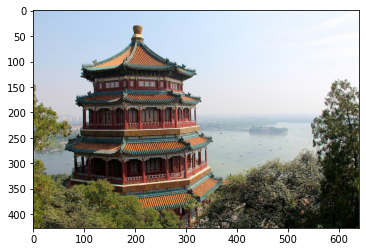

In [113]:
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle

n_colors = 20
image = load_sample_image("china.jpg")
plt.imshow(image)
image_scaled = np.array(image, dtype=np.float64) / 255
w, h, d = image_scaled.shape
image_array = np.reshape(image_scaled, (-1, d))

### Wykrywanie obszarów

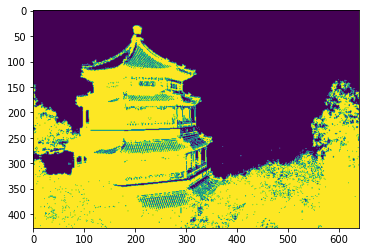

In [115]:
kmeans = KMeans(n_clusters=2).fit(image_array)
plt.imshow(kmeans.labels_.reshape(w, h, -1))

### Kompresja zdjęć

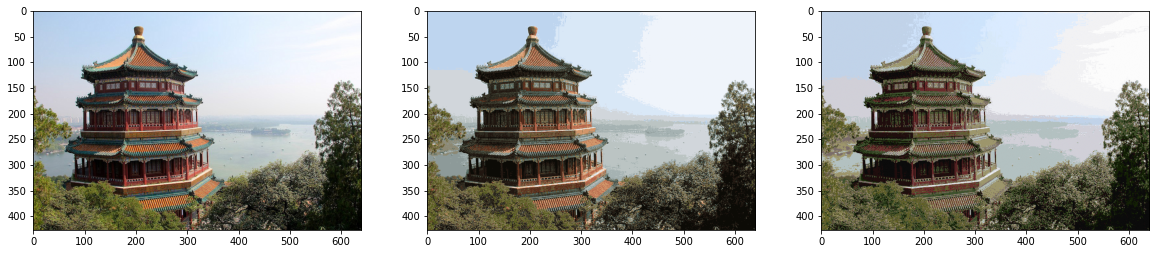

In [120]:
image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

codebook_random = shuffle(image_array, random_state=0, n_samples=n_colors)
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 20))
ax1.imshow(image)
ax2.imshow(kmeans.cluster_centers_[labels].reshape(w, h, -1))
ax3.imshow(codebook_random[labels_random].reshape(w, h, -1))

0.0